# HackerNews API

In [1]:
import requests

In [2]:
url = 'https://hacker-news.firebaseio.com/v0/'

### Items

In [2]:
response = requests.get(url + 'item/32136384.json')
print(response.status_code)

In [6]:
response.json()

{'by': 'neya',
 'descendants': 21,
 'id': 32136384,
 'kids': [32137133,
  32137380,
  32137382,
  32137285,
  32137153,
  32137357,
  32137212,
  32137161,
  32137286,
  32137493,
  32137376],
 'score': 115,
 'time': 1658138113,
 'title': 'Gnucash – open-source accounting software for personal and small businesses',
 'type': 'story',
 'url': 'https://www.gnucash.org/?hn'}

Try to get a comment

In [7]:
response = requests.get(url + 'item/32137133.json')
print(response.status_code)

200


In [8]:
response.json()

{'by': 'hevsuit',
 'id': 32137133,
 'kids': [32137681, 32137708, 32137605],
 'parent': 32136384,
 'text': 'I&#x27;ve been using Gnucash since 2020 to manage personal expenses and income, and it has made the world of a difference. In particular, I find the income statement feature very powerful when I&#x27;m doing an end-of-year review of my spending.<p>In terms of time commitment, about 20 mins every two weeks seems to be enough for logging all my transactions into Gnucash - I have 3 bank accounts, 1 investment account and 1 retirement account.',
 'time': 1658144928,
 'type': 'comment'}

### User

In [9]:
response = requests.get(url + 'user/hevsuit.json')
print(response.status_code)

200


In [10]:
response.json()

{'about': 'Student\nStudied electrical engineering,\nLove this website',
 'created': 1397837338,
 'id': 'hevsuit',
 'karma': 17,
 'submitted': [32137802,
  32137133,
  21005967,
  8290021,
  8151968,
  7696303,
  7696300,
  7609738]}

In [11]:
response.json()['submitted']

[32137802, 32137133, 21005967, 8290021, 8151968, 7696303, 7696300, 7609738]

### Newstories

In [12]:
response = requests.get(url + 'newstories.json')
print(response.status_code)

200


In [14]:
len(response.json())

500

In [15]:
new_stories = response.json()

In [23]:
import time

In [24]:
story_time = {}
for story in new_stories:
    response = requests.get(url + f'item/{story}.json')
    if response.status_code == 200:
        times = response.json().get('time')
        story_time[story] = times
    time.sleep(1)

In [26]:
# story_time

In [27]:
import pandas as pd

In [28]:
times = []
for time in story_time.values():
    times.append(pd.to_datetime(time, unit='s'))

Let's find out how many seconds usually takes until new story arrives to a website.

In [29]:
import numpy as np

In [30]:
times = np.array(times)

So here I took first all elements but the last and all elements, but the first and substracted one after one

In [32]:
# times[:-1] - times[1:]

Take only seconds (not Timedelta)

In [34]:
delta_seconds\
    = list(map(lambda x: x.seconds, times[:-1] - times[1:]))

Let's find the mean time between stories

In [35]:
np.mean(delta_seconds)

136.7935871743487

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'delta between new posts (in seconds)')

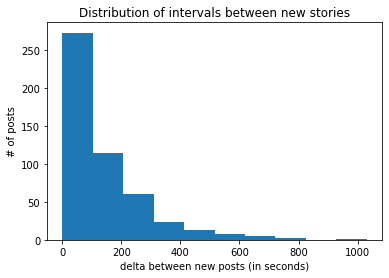

In [39]:
plt.hist(delta_seconds)
plt.title('Distribution of intervals between new stories')
plt.ylabel('# of posts')
plt.xlabel('delta between new posts (in seconds)')